In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [172]:
df = pd.read_csv('/content/train.csv')

In [173]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [174]:
df.shape

(8523, 12)

In [175]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [176]:
#to know the average weight..
df['Item_Weight'].mean()

np.float64(12.857645184135976)

In [177]:
#to fill Na values with mean().. of the specified column "Item_Weight"
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [178]:
df['Item_Weight'].isnull().sum()

np.int64(0)

In [179]:
print(df['Item_Weight'])

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64


In [180]:
#Get mode of Outlet_Size for each Outlet_Type
mode_of_outlet_size = df.groupby('Outlet_Type')['Outlet_Size'].agg(lambda x: x.mode()[0])

In [181]:
#Fill missing Outlet_Size with according to thier Outlet_Type values using map
df['Outlet_Size'].fillna(df['Outlet_Type'].map(mode_of_outlet_size), inplace=True)

In [182]:
print(df['Outlet_Size'])

0       Medium
1       Medium
2       Medium
3        Small
4         High
         ...  
8518      High
8519     Small
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object


In [183]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [184]:
#making the feature names into lower case
df.columns = df.columns.str.lower()

In [185]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Data Visualization**

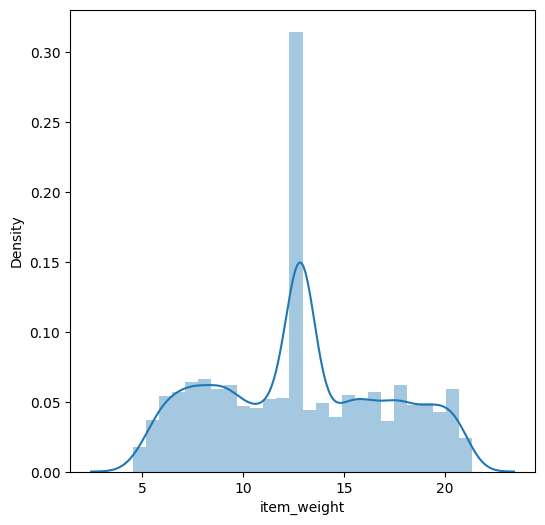

In [186]:
#to know the distribution of Item_weight..
plt.figure(figsize=(6,6))
sns.distplot(df['item_weight'])
plt.show()

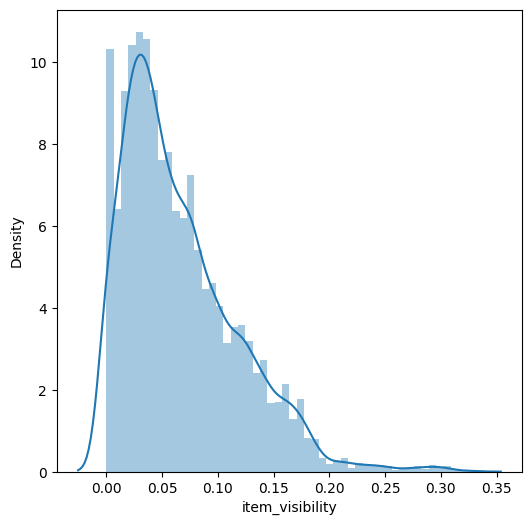

In [187]:
#TO know the distribution of visibility
plt.figure(figsize=(6,6))
sns.distplot(df['item_visibility'])
plt.show()

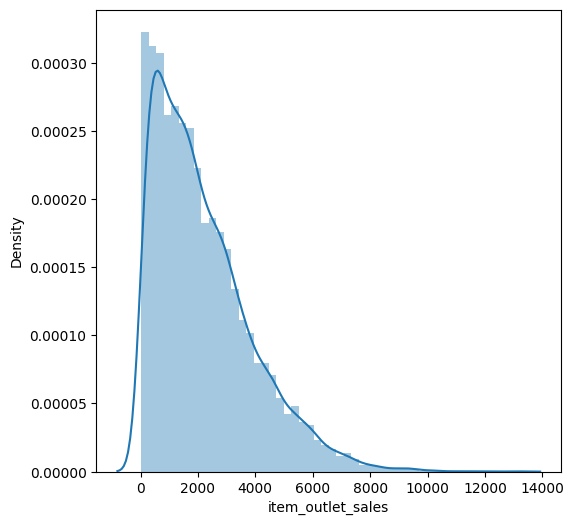

In [188]:
#To know the distribution of item sales
plt.figure(figsize=(6,6))
sns.distplot(df['item_outlet_sales'])
plt.show()

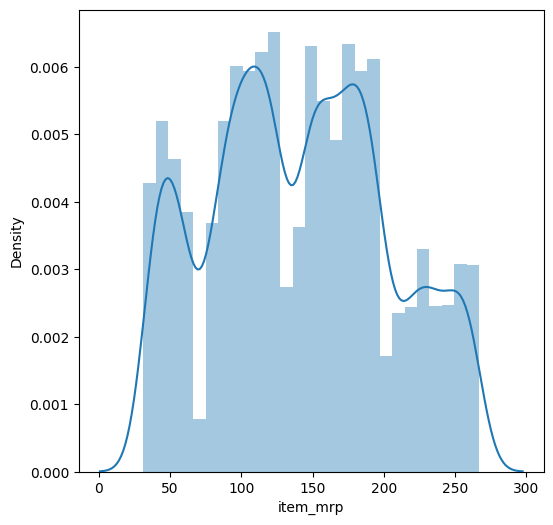

In [189]:
#to know the distribution of item Mrp
plt.figure(figsize=(6,6))
sns.distplot(df['item_mrp'])
plt.show()

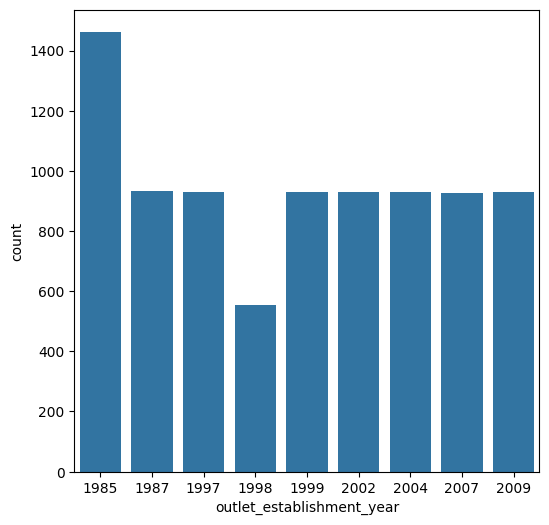

In [190]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='outlet_establishment_year', data=df)
plt.show()

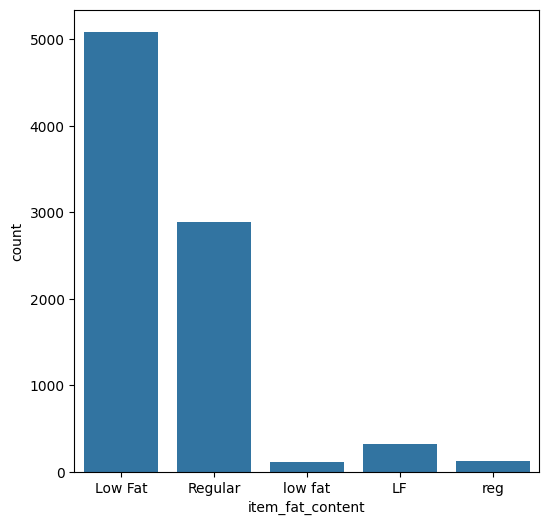

In [191]:
#Item Fat Content
plt.figure(figsize=(6,6))
sns.countplot(x='item_fat_content', data=df)
plt.show()

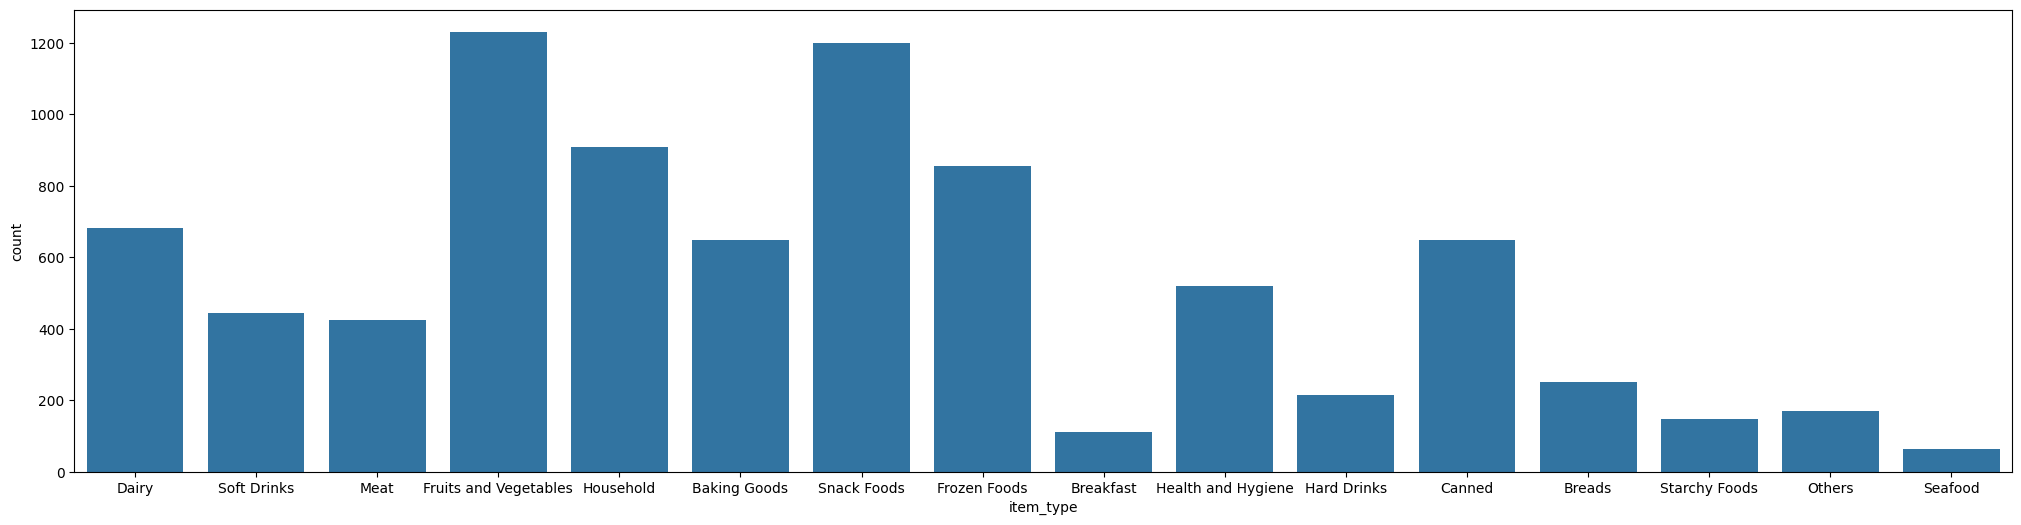

In [192]:

plt.figure(figsize=(25,6))
sns.countplot(x='item_type', data=df)
plt.show()

In [193]:
df['item_fat_content'].value_counts()

,count
item_fat_content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [194]:
df.replace({'item_fat_content':
                              {'low fat':'Low Fat',
                               'reg':'Regular',
                               'LF':'Low Fat'}
            },inplace=True)

In [195]:
df['item_fat_content'].value_counts()

,count
item_fat_content,
Low Fat,5517
Regular,3006


**Label Encoding**

In [196]:
from sklearn.preprocessing import LabelEncoder

In [197]:
encoder = LabelEncoder()

In [198]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [199]:
# Apply label encoding to categorical columns
df['item_identifier'] = encoder.fit_transform(df['item_identifier'])
df['item_fat_content'] = encoder.fit_transform(df['item_fat_content'])
df['item_type'] = encoder.fit_transform(df['item_type'])
df['outlet_identifier'] = encoder.fit_transform(df['outlet_identifier'])
df['outlet_size'] = encoder.fit_transform(df['outlet_size'])
df['outlet_location_type'] = encoder.fit_transform(df['outlet_location_type'])
df['outlet_type'] = encoder.fit_transform(df['outlet_type'])

In [200]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


**Splitting the Data**

In [201]:
X = df.drop(columns='item_outlet_sales',axis=1)
Y = df['item_outlet_sales']

In [202]:
print(X)

      item_identifier  item_weight  item_fat_content  item_visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      item_type  item_mrp  outlet_identifier  outlet_establishment_year  \
0             4  249.8092                  9    

In [203]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: item_outlet_sales, Length: 8523, dtype: float64


**Train Test And Split**

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [206]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


**Model Evaluation**

In [207]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [208]:
def evaluate(true,predicted):
  mae = mean_absolute_error(true,predicted)
  mse = mean_squared_error(true,predicted)
  rmse = np.sqrt(mean_squared_error(true,predicted))
  r2 = r2_score(true,predicted)

  return mae,mse,rmse,r2

**Model Training**

In [213]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score

In [214]:
models = [LinearRegression(),Lasso(),Ridge(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(),SVR(),XGBRegressor()]

In [215]:
for model in models:
  model.fit(X_train,Y_train)

  Y_train_pred = model.predict(X_train)
  Y_test_pred = model.predict(X_test)

  print("Model Name:",model)
  print()

  print("Training Performance:")
  mae,mse,rmse,r2 = evaluate(Y_train,Y_train_pred)
  print("MAE:",mae)
  print("MSE:",mse)
  print("RMSE:",rmse)
  print("R2:",r2)
  print()

  print("Testing Performance:")
  mae,mse,rmse,r2 = evaluate(Y_test,Y_test_pred)
  print("MAE:",mae)
  print("MSE:",mse)
  print("RMSE:",rmse)
  print("R2:",r2)
  print()

  cv_score = cross_val_score(model,X,Y,cv=5)
  print("Cross Validation Score:",cv_score)
  print()
  print("Mean Cross Validation Score:",np.mean(cv_score))
  print()

Model Name: LinearRegression()

Training Performance:
MAE: 891.8379831319259
MSE: 1412891.9857762973
RMSE: 1188.6513306164668
R2: 0.5071929167339231

Testing Performance:
MAE: 944.869172118322
MSE: 1577094.25267757
RMSE: 1255.8241328615923
R2: 0.48912987193626367

Cross Validation Score: [0.51819979 0.5040836  0.48307066 0.50208964 0.49990968]

Mean Cross Validation Score: 0.5014706742880868

Model Name: Lasso()

Training Performance:
MAE: 892.0179284543962
MSE: 1413305.8942354086
RMSE: 1188.825426307584
R2: 0.5070485482878371

Testing Performance:
MAE: 945.9047806354715
MSE: 1578969.3116324414
RMSE: 1256.570456294609
R2: 0.488522481726848

Cross Validation Score: [0.51823991 0.50346358 0.48228086 0.50275572 0.49990981]

Mean Cross Validation Score: 0.501329977108039

Model Name: Ridge()

Training Performance:
MAE: 891.8465277623708
MSE: 1412908.7548022573
RMSE: 1188.6583843990911
R2: 0.5071870678120977

Testing Performance:
MAE: 945.0197638192195
MSE: 1577360.3202610386
RMSE: 1255.930

In [228]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter space for tuning
xgb_params = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3, 0.5]
}

# Base model
xgb = XGBRegressor(random_state=42, n_jobs=-1)

# Randomized Search CV
xgb_cv = RandomizedSearchCV(estimator=xgb,
                            param_distributions=xgb_params,
                            n_iter=25,
                            scoring='r2',
                            cv=5,
                            verbose=2,
                            n_jobs=-1,
                            random_state=42)

# Fit the model
xgb_cv.fit(X_train, Y_train)

# Best model
best_xgb = xgb_cv.best_estimator_


Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [231]:
model = xgb_cv.best_estimator_

In [232]:
print(model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)


In [233]:
model.fit(X_train,Y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_score = r2_score(Y_train,train_pred)
test_score = r2_score(Y_test,test_pred)

print("Train Score:",train_score)
print("Test Score:",test_score)

Train Score: 0.6341781120699235
Test Score: 0.5810881510925672


In [238]:
input_data = [157, 9.3, 1, 0.016047301, 4, 249.8092, 5, 1999, 1, 0, 1]

input_array = np.asarray(input_data).reshape(1,-1)

prediction = model.predict(input_array)

print(prediction)

[4059.9912]


In [239]:
import pickle

In [240]:
with open('big_mart.pkl','wb') as f:
  pickle.dump(model,f)

In [241]:
with open('big_mart.pkl','rb') as f:
  model = pickle.load(f)